# Data Science For The Insurance Industry 
#### Rahul Birmiwal
#### Sept 2018
#### Manhattan Life Insurance Company
#### Prepared For Mr. Tyler Harris, Data Analytics







## Table of Contents: 

- ** I      Introduction to Data Science & Machine Learning Methods ** 
- ** II.    The Machine Learning "Black Box"** 
- ** III.   Textual Data Handling - ICD 10 Codes ** 
- ** IV.    Choice of Response Variable ***y*** -- Adapting To Different Use Cases** 
- **  V.     Python Data Science for Lapse Risk Modelling ** 
- **  VI.    Claims Ranking and Logistic Regression -- Kaggle Data ** 
- ** VII.   Fraudulent Claims Data** 
- ** VIII.  Using Machine Learning Output For Business Decision Making**
- ** IX. Other Provided Files **
- ** X Further Reading **
- ** XI. An Aside: ARIMA Modelling ** 
- ** XII. Overview of Use-Case Ideas For Insurance Industry ** 
- ** XIII. References **


The following paper provides a general framework for applying data science and machine learning techniques to life insurance-industry related domains. These domains can include
    - Lapse Risk Modelling 
    - Claims Ranking and Logistic Regression -- Kaggle Data
    - Fraudulent Claims Detection
    - Using machine learning for business practice. 
    
The paper delves into the above domain-specific chapters in the latter half of the paper. The early portions of this paper provide a quick flash study --  from a foundational knowledge base regarding data science/machine learning to original implementations of machine learning models in Python and other code snippet examples that are pertinent to the latter discussion surrounding solving insurance data problems. 

This paper comes with various source code files that can hopefully serve as a reference guide for data science practice in Python. 

Machine learning can be daunting; the field itself is very new beginning really only in the late 20th century. Furthermore there is "some" research literature regarding ML for insurance data, but the spectrum is limited. As a result, this paper is borne from a conglomeration of sources, some from graduate school and prolific professors, some from the (minimal) set of research found (see references section), some sources pertain indirectly to the problems at end (such as textual data handling), and some sources are simply how the author would tackle a type of problem. 

## I. Introduction to Data Science & Machine Learning Methods 
There are hundreds of brilliant books, papers, websites, etc. on data science and machine learning, and while this section is most certainly a far cry from the depth addressed in these other materials, here we simply address "fundamental building block" ideals of DS/ML upon which predictive modelling for the aforementioned two domains (or any other future work) can be based. 

The term data, which we define as a matrix ***X*** is broad and vague, but can be decomposed into its defining schema, i.e. a relation **R(a, b, c, ..., z)** where *a,b,c...* are the columns are the data. ***X*** is then a matrix representation of ***R*** (without the column names...obviously). Now, pertinent to insurance-industry data, where fields/columns can (often are) textual (or simply non-numeric), we define a decomposition of any data ***X*** into **X.num** and **X.tex**, where X.num is the numeric portion of the data; X.tex likewise the remained/textual/unstructured portion. For simplicity we assume here that X.tex is only textual (string) data. 

Lastly, we assume there exists a target/response variable within ***X*** (can be numeric, textual, ordinal, categorical, etc). This is the variable the ML algorithms will seek to target. We call this ***_y_*** 

Under this framework of **X.tex**, **X.num** and ***y*** we bring into discussion machine learning algorithms. Like a craftsmiths' toolbox, the universe of ML algorithms is huge and ever expanding. Fundamentally, a machine learning algorithm, given a set of constraints and d-dimensional feature space (number of columns in **R**), seeks to find the coefficients $\vec{\beta} \in \mathbf{R}^D$ such that a desired loss (also called "objective") function is minimized, where informally the loss function can be described as a function of the difference between the actual *y* values and predicted *y* values.

That is: we assume a statistical model that our target ***y*** is a linear combination of the columns in ***X***
$$
\begin{align*}
    y(\beta) = \beta_0x_0 + \beta_1x_1 + ... + \beta_dx_d  
\end{align*}
$$

where $\beta$ a d-dimensional vector are the coefficients of the model. 

*The model assumes that a "true" or "ideal" $\beta$ exists. The whole point of statistical modelling and machine learning is to find, as best we can, that $\beta$*

Machine learning seeks to search, sometimes for days running on an ultra fast computer, a $\hat{\beta}$ such that for all possible values in ***y*** that our prediction y-hat: 

$$
\begin{align*}
    y(\hat{\beta}) = \hat{\beta}_0x_0 + \hat{\beta}_1x_1 + ... + \hat{\beta}_dx_d  
\end{align*}
$$

is as close to $y(\beta)$ as possible, or in otherwords in the most simplest case that, the net error, or loss as is called in ML: $Loss=y(\beta) - y(\hat{\beta})$ is minimized. 

All loss functions, with matrix $\mathbf{X} \in R^{nxd}$ and target response vector/labels $\mathbf{X} \in R^{nx1}$ are of the form:

$$
\begin{align*}
    \mathbf{J}(\beta) &= \vec{y} - \vec{y'} + \text{Regularization}\\
              &= \frac{1}{N}\sum_{i=1}^{d} loss_i(y_i, \vec{x_i}) + \mathbf{\Omega(\beta)} \\
    &\text{where Omega is some penalty/regularization function on beta} \\ 
    &\text{and loss() is a scalar function between class label y_i and data point vector x_i}
\end{align*}
$$

and machine-learning can be written succintly as: 
$$
\begin{align*}
    argmin_{\vec{\beta} \in \mathbf{R}^D} \mathbf{J(\beta)} 
\end{align*}
$$


The classical L2-Regularized Regression (OLS Regression) loss-function, for example is: 
$$
\begin{align*}
    F(\beta) =  \frac{1}{N}\sum (y_i - \vec{x_i}^T\vec{\beta})^2 + \lambda||\vec{\beta}||^2 \\
    &\text{where we have used F for visual contrast}
\end{align*}
$$
     
Now on a fundamental level **ALL** ML algorithms' loss functions have the form of **J**, which under-the-hood require vector-by-vector operations, (i.e. dot product) and *therefore require numerical values upon which to operate*

With that said, "fancier" ML algorithms (and not to discount from the research, people, etc. from which they are borne) are simply more complex versions of **J**. For example a neural network has a $ \mathbf{J} = f(J_1, J_2, J_3,..)$ where the inner Js are merely other other loss functions of the same form as the original **J**. Another example: other algorithms, such as a logistic regression model vs. a linear support vector machine, differ essentially only in their loss function (one uses log-loss, the other some sort of "hinge loss"). Takeaway these "names" however, and the loss function of any **J** is simply a differential and convex function; fancier ML algorithms, in a simplisitic view, just tweak the mathematical properties of this differential, convex function to the nature of the data/problem at hand and usually have faster solutions to this convex optimization problem. 

The performance benefit gained from shifting from, say, the basic linear support vector machine with squared hinge loss, to a recursive neural network, may be large. However, *Wang, Yibo & Xu, Wei. Leveraging deep learning with LDA-based text analytics to detect automobile insurance fraud* show that with respect to insurance data, which is a combination of numeric and textual fields (See Section III below), that those fancy models only exhibit slightly improvement. Therefore with regards to this paper, fancier ML models are certainly not worth the complexity required; therefore we need only consider *simple* models. 

Therefore for *any* data ***X*** such that the full dataset is numeric, any *arbitrary* ML algorithm can work (of course, once determined if the algorithm need be regression or classification). The fact that our data, for example, is pertinent to the insurance industry has no bearing on the underlying mathematics behind the ML algorithms themselves. The domain-specific knowledge, whether that be that the data is for insurance purposes, or modelling climate change, or predicting number of airline travellers on Thanksgiving, can just be prefixed and appended to that machine learning engine. Of course one may say that one can modify the loss function to account for domain-specific knowledge. That is true, and if the situation is simple enough, is feasable. However, when the number of predictors/size of the data is very large, it can be very hard to create a "custom" decaying loss function that is guaranteed to be differentiable and convex over $R^D$. For the purposes of this paper in its application of data science to insurance data, we only take the former route.  

Problems do arise, however, when textual data, exists. Namely we must define some intermediary mapping from the full alphanumeric space, to only the numeric space. There is no cookie-cutter method to accomplish this, per se. Technically one can apply a hashcode to any string (ala how Python dictionaries or R's named lists work), but this is both generally computational ill-advised (what if the lexicon of ***X.tex*** is gigantic?) as well as theoretically "dumb" -- using such one-hot encoding, on the large-scale, would necessitate the original feature vectors be augmented with the "entire lexicon" and therefore essentially modify the original ***X*** matrix to be "infinitely"-dimensional, but of course where 99% of the covariates in this new matrix are just useless. 

Consequently, we have a scenario where "feature engineering" from **X.tex** will become domain-specific. But once such feature engineeing successfully maps the textual data to numeric data, we can then proceed as aforementioned, using any arbitrary ML algorithm depending on the type of problem. 


## II. The Machine Learning "Black Box"

One of the primary use-cases for machine learning is to predict some sort of variable(s). With respect to our domain, that variable could be lapse risk, or whether or not a particular claim is fraudulent, etc. Continuing the above discussion of loss functions, etc. we provide a flash flyover of fundamental machine learning concepts after model selection is determined. 

We previously described how given a chosen model/loss function, ML can be formally written as: 
$$
\begin{align*}
    argmin_{\vec{\beta} \in \mathbf{R}^D} \mathbf{J(\beta)} 
\end{align*}
$$

What does this mean? Let us take the case of classical OLS (L2-Regularized) Regression. We have the loss function, in matrix notation: 
$$
\begin{align*}
    \mathbf{J(\beta)} = (\mathbf{y} - \mathbf{X}^T\vec{\beta})^2
\end{align*}
$$

Now we seek to find the coefficients $\beta$ that minimize J. Let's go back to Calculus I and recall how to minimize a function: take the derivative and set it to zero. 

A similar process is done through an algorithm called *gradient descent* which is the underbelly for almost all ML training methods. An analogy is thus: suppose we are at the top of a very tall hill. Our objective is to reach the bottom of the hill, but being a computer, we are (blind). Thus we propose the following solution to reach the hill's bottom: take a step, then survey the ground. After each step, determine the direction that descends steepest. Then take another step in that direction. Repeat the process until we reach the bottom of the hill! 

Mathematically the hill is our loss function we are trying to minimize; the gradient is the direction of steepest descent. Now we are guaranteed to reach the bottom of the hill if one, the loss function is convex (analogy here being that our hill doesn't have "mountains" poking out of it on the way down), and differentiable (analogy here being that there are no holes one can fall into and get forever "stuck"). Gradient descent then writes as: 

$$
\begin{align*}
    \text{initialize:} \hspace{1cm} \mathbf{\beta}_{0} = \mathbf{\vec{0}}\in R^d \\
    \text{WHILE (not converged) do:} \\ 
    \text{update:} \hspace{1cm} \mathbf{\beta_t} &= \mathbf{\beta}_{t-1} - \nabla{J(\beta_{t-1})}
\end{align*}
$$


Fancier, more elaborate ML algorithms employ sped-up and "smarter" versions of gradient descent, hence the names i.e. Accelerated Gradient Descent, Boosting Support Vector Machine, Adaboost, but the concept is still the same as trumbling to the bottom of an undulating hill. 

Thus to use gradient descent, we need the gradient $\nabla{J(\beta)}$. Using matrix calculus, we quickly obtain that for OLS it is 
$$
\begin{align*}
    \vec{\nabla{J(\beta)}} = -2\mathbf{X}^T(\mathbf{y} - \mathbf{X}^T\vec{\beta})
\end{align*}
$$



## III. Textual Data Handling - ICD 10 Codes 

While the clear majority of data pertinent to insurance claims, etc. will be numeric, the one textual bottleneck deals with descriptions of the claimaint(s) medical conditions/history/etc themselves. Fortunately, the medical world has developed a statistical classification system to designate the plethora of medical-related "keywords." Akin to the Dewey Decimal System, the ICD-10 system is a classification system that groups, subgroups and subdivides medical keywords.  

There are different "chapters" within the ICD-10 system, chapters (I,II, ...XXII) where i.e. chapter XIII is defined in the range M00-M99 (Diseases of the musculoskeletal system and connective tissue)

Codes within a specific chapter are defined in i.e. M00.xx -- M99.xx where xx is in 1,2,3....99. This classification system is therefore akin to a tree-like structure, where: 
1. first three characters of the ICD-10 string determine chapter
2. The region M00-M99 is subdivided into subregions. For example M05-M14 is for "Inflammatory polyarthropathies"
3. The .X defines each of the individual names of diseases/medical field/etc. within its subregion. 

With this in mind, while the full ICD-10 string i.e. "M05.3" may be useful, what is perhaps *more* useful is the name of the subregion (i.e. "Inflammatory polyarthropathies"). 

So what is the data scientist presented in this situation? We have non-numeric data, i.e. "M05.3" or "H45.82". There are several approaches one could take here. We provide a brief discussion on those before a fuller discussion on perhaps the most malleable and "smartest" approach: Latent Dirichelet Allocation (LDA). 

### 1a. Strict "Hash" Function

For reasons discussed hitherto, not a good idea. 

### 1b. Tokenization/Indexation 

Instead of hashing, a similar method would be to map each unique non-numeric element in a given data series to a token/index. For example given a set S=["hello my name is", "fox", "I like Olive Garden", "3XHU, "fox"], its tokenization form would be S = [0,1,2,3,1]. The code snippet below is an example of applying this method to each column in a Python pandas data frame: 
```python
for (train_name, train_series) in pd_x_train.iteritems(): 
    if train_series.dtype == 'O':
        #for objects: factorize
        pd_x_train[train_name], tmp_indexer = pd.factorize(pd_x_train[train_name])
```
### 2. Alpha-Numeric Split 

Of note is that the data structure here is a concatenation of alphabetical and numerical elements. One could split this datum into two separate data fields along the alpha-numeric line (i.e. M, and 05.3). 
While a good idea perhaps, this is not recommended as the ICD-10 classification system, in contrast, splits *after* the M.xx element, not on "M" itself. This intuition propels us to the third approach: 

### 3. Classification Split 

Split on the ICD-10 classification boundaries themselves. I.e. M05.3 --> M05, 3.0. This *can* work, however the number there are 26 letters x 100 numbers = 2600 possible entries for the "first" datum here, which may be "too specific." That is, what may result is a similar scenario to as if we one-hot encoded into a massive feature-space. 

### 4. Classification Split II. 

Along the same lines as number 3, we can slightly modify the approach to yield more useful data. Each chapter is subdivided into different subchapters, each subchapter housing a set of homogenous medical fields. For example Chapter II has the following classification structure: 
`
1 C00–D48 – Neoplasms

    1.1 (C00–C14) Malignant neoplasms, lip, oral cavity and pharynx
    1.2 (C15–C26) Malignant neoplasms, digestive organs
    1.3 (C30–C39) Malignant neoplasms, respiratory system and intrathoracic organs
    1.4 (C40–C41) Malignant neoplasms, bone and articular cartilage
    1.5 (C43–C44) Malignant neoplasms, skin
    1.6 (C45–C49) Malignant neoplasms, connective and soft tissue
    1.7 (C50–C58) Malignant neoplasms, breast and female genital organs
    1.8 (C60–C63) Malignant neoplasms of male genital organs
    1.9 (C64–C68) Malignant neoplasms, urinary organs
    1.10 (C69–C72) Malignant neoplasms, eye, brain and central nervous system
    1.11 (C73–C75) Malignant neoplasms, endocrine glands and related structures
    1.12 (C76–C80) Malignant neoplasms, secondary and ill-defined
    1.13 (C81–C96) Malignant neoplasms, stated or presumed to be primary, of lymphoid, haematopoietic and related tissue
    1.14 (C97) Malignant neoplasms of independent (primary) multiple sites
    1.15 (D00–D09) In situ neoplasms
    1.16 (D10–D36) Benign neoplasms
    1.17 (D37–D48) Neoplasms of uncertain or unknown behaviour
`

Therefore instead of splitting i.e. C34.11 into C34 and 11, we would split into "Malignant neoplasms, respiratory system..." and 11. 

Notice that the key jump here is that we are going deeper into the "fullname" of fuller text description of the original datum. 

This approach can work, but it posits two issues: First, is that the second datum, (i.e. 11) has no stand-alone value: the numerical value 11 *only* has meaning within the context of its subchapter. As such it *cannot* be interpreted as a normal numerical value. Second: we now have a much bigger text string (i.e. "Malignant neoplasms, respiratory system and intrathoracic organs"). What does one do now?

### 5. Latent Dirichelet Allocation 

We now proceed to the most abstract, but adaptable, text data mining approach: Latent Dirichelet Allocation (LDA). In short, LDA is an inferencing or generative model that seeks, for a collection of **documents**, and a hyperparameter **number of topics**, to find a collection of **topics** such that each document can be seen a distribution of words drawn from its maximal-likelihood topic. Developed by Ng, Blei, Jordan in their canonical paper "Latent Dirichelet Allocation," LDA is widely used in academia and industry and itself and its variants are a gold-standard approach to textual data mining. 

We provide the introduction to the paper here for further elaboration: 


*We describelatent Dirichlet allocation(LDA), a generative probabilistic model for collections of
discrete data such as text corpora. LDA is a three-level hierarchical Bayesian model, in which each
item of a collection is modeled as a finite mixture over an underlying set of topics. Each topic is, in
turn, modeled as an infinite mixture over an underlying set of topic probabilities. In the context of
text modeling, the topic probabilities provide an explicit representation of a document...
In this paper we consider the problem of modeling text corpora and other collections of discrete
data.The goal is to find short descriptions of the members of a collection that enable efficient
processing of large collections while preserving the essential statistical relationships that are useful
for basic tasks such as classification, novelty detection, summarization, and similarity and relevance
judgments* 


How do we use this? 

First in the data files provided with this report there is a file `icd_code_description_map.csv` which contains the full mapping between ALL codes, and their full descriptions, i.e. : 

`
...
...
A759,Typhus fever,,,,
A770,Spotted fever due to Rickettsia ricket,tsii,,,
A771,Spotted fever due to Rickettsia conori,i,,,
A772,Spotted fever due to Rickettsia siberi,ca,,,
A773,Spotted fever due to Rickettsia austra,lis,,,
A7740,Ehrlichiosis,,,,
A7741,Ehrlichiosis chafeensis [E. chafeensis,],,,
A7749,Other ehrlichiosis,,,,
A778,Other spotted fevers,,,,
A779,Spotted fever,,,,
A78,Q fever,,,,
A790,Trench fever,,,,
A791,Rickettsialpox due to Rickettsia akari,,,,
A7981,Rickettsiosis due to Ehrlichia sennets,u,,,
A7989,Other specified rickettsioses,,,,
A799,Rickettsiosis,,,,
A800,Acute paralytic poliomyelitis,,,,
A801,Acute paralytic poliomyelitis,,,,
A802,Acute paralytic poliomyelitis,,,,
A8030,Acute paralytic poliomyelitis,,,,
A8039,Other acute paralytic poliomyelitis,,,,
A804,Acute nonparalytic poliomyelitis,,,,
A809,Acute poliomyelitis,,,,
...
...
`

where i.e. A759 is codeform for A75.09. 

Let our ***original*** claims data be of the form ***X*** = **R(......., ICD_10, ......)** where ICD_10 is a string format of the above codes i.e. "A7891"
The approach is thus: 
1. Select desired number of topics, $\kappa$ (hyperparameter)
2. Let all description strings above form the training document / training data matrix $\mathbf{\Gamma}$. That is, for each string datum $s_i$ in the right-hand column of icd_code_description_map, create an array $\mathbf{\Gamma} = [s_1,s_2...,s_N]$.
3. Train a LDA Classifier, `clf`, on $\mathbf{\Gamma}$: clf.train($\mathbf{\Gamma}$, $\kappa$)


4. For all ICD_10 datum $w$ in ***X***, let $\hat{w}$ <- `clf.classify(w)` where the output (topic number) of _classify()_ is the argmax  infered probability over all possible topics
5. For all ICD_10 datum  $w$ in ***X*** replace: $w$ <- $\hat{w}$ respectively; $w$ is now of datatype numeric, representing the topic number for medicical condition originally defined via ICD_10 and `icd_code_description_map.csv` 
6. Do until satisfied: Perform cross-validation/training on this updated ***X*** using a (different) classifier and algorithm of choice (i.e. Linear SVM using accelerated gradient descent with hyperparamter $\lambda$). If necessary, repeat steps 1-6 using a different $\lambda$ and/or $\kappa$

To show that the above is actually not that complex, we display its Python implementation source code (note all source code files will be in Python)

```python
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import pandas as pd
from pathlib import Path
import nltk


def lemmatize_stemming(text):
    stemmer = PorterStemmer()
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))


def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 0:
            result.append(lemmatize_stemming(token))
    return result

def preprocess_helper(train_text_df):
        data_text = train_text_df[[0]]
        data_text['index'] = data_text.index
        processed_doc = data_text[0].map(preprocess)
        dictionary =  gensim.corpora.Dictionary(processed_doc)
        return(processed_doc, dictionary)

class LDA_Classifier():
    def __init__(self, kappa, gamma):
        self.kappa = num_topics
        self.gamma = gamma
        self.dictionary = None
        self.processed_doc = None
        self.lda_model = None

    def preprocess(self):
        (self.processed_doc, self.dictionary) = preprocess_helper(self.gamma)

    def train(self):
        bow_corpus = [self.dictionary.doc2bow(doc) for doc in self.processed_doc]
        self.lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=self.kappa, id2word=self.dictionary, passes=2, workers=2)

    def classify(self, unseen_text_string):

        bow_vector = self.dictionary.doc2bow(preprocess(unseen_text_string))
        for index, score in sorted(self.lda_model[bow_vector], key=lambda tup: -1*tup[1]):
            print("Score: {}\t Topic: #{} {}".format(score, index, self.lda_model.print_topic(index, 5)))

        print(".....NOW RETURNING THE ARGMAX TOPIC BASED ON SCORE...")
        return(sorted(self.lda_model[bow_vector], key=lambda x: x[1])[-1][0])

def example_run():
    root = Path(__file__).parents[1]
    print(root)
    icd_mapping = pd.read_csv(root / "relevant_data_files" / "icd_code_description_map.csv",delimiter=",")

    data_text = icd_mapping[['Des']]
    data_text['index'] = data_text.index
    data_text.columns=[0,'index']

    my_lda_classifier = LDA_Classifier(kappa=25,gamma=data_text )
    my_lda_classifier.preprocess()
    my_lda_classifier.train()

    test_string = "typhoid fever and swelling"
    (classified_topic) =  my_lda_classifier.classify(test_string)
    print(classified_topic)

if __name__ == "__main__":
    nltk.download('wordnet')
    np.random.seed(2018)
    example_run()

```

## IV. Choice of Response Variable ***y*** -- Adapting To Different Use Cases

Hitherto we have kept our discussion on the nature of the training matrix ***X***. Now we turn to the response vector ***y***, namely discussing different forms ***y*** may take, or ought to take, depending on end-user use cases. For each case, we provide ML algorithm and the corresponding Python scikit-learn model syntax. Full examples may be found in `examples.py` or `demo.py`. From scratch implementation of the weighted-OVR multiclass model (see below) can be found in `linearsvm.py`

### IV.i Binary Classification 

$y \in {0,1}$: one may use a linear support vector machine, which tends to be faster than logistic regression due to absence of large exponentiation/log. 
```python
class sklearn.svm.LinearSVC(penalty=’l2’, loss=’squared_hinge’, dual=True, tol=0.0001, C=1.0, multi_class=’ovr’, fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000
```

### IV.ii Multiclass Classification

$y \in K=[0,1,2...N]$ (values in K are arbitrary). 
A multiclass problem can be solved using approaches revolving around an "ensemble" of individual binary classifiers. Here we discuss the weighted-OVR, or weighted one-v-rest approach. The approach is, for the number of classes N, train N distinct binary classifiers (say Linear SVM), where the $jth$ classifier, $0 \leq j \leq N$ *transforms* the original $\mathbf{y}$ (which recall has N unique) values a new  $\hat{\mathbf{y}} $ such that 

$$\hat{\mathbf{y_i}} = 1, \hspace{0.5cm} \text{if y_i == j} \\
   \text{and zero otherwise} 
$$

Classification/prediction is then done by doing a "majority vote": classify a new data point $y_{new}$ against all N binary classifiers and select the class that does $y_{new} = argmax(classifier.score())  \hspace{0.2cm} \forall \hspace{0.2cm}\text{classifiers in ensemble}$

A natural question to ask is how does such ensemble account for skewed data -- i.e. when there are many more occurences of particular class number(s) in the data set compared to others. We can "rebalance" the ensemble by applying an approriate weight $\rho_i\hspace{0.2cm} \forall \hspace{0.2cm} i \in K$ to the $\hat{y}=1$ terms (where recall in the ensemble, we have "aliased" each of the N classes using a binary classifier and its jth position within the ensemble). 

It has been shown (Z. Akata, F. Perronnin, Z. Harchaoui and C. Schmid, "Good Practice in Large-Scale Learning for Image Classification," in IEEE Transactions on Pattern Analysis and Machine Intelligence, vol. 36, no. 3, pp. 507-520, March 2014.
doi: 10.1109/TPAMI.2013.146) that the weighted-OVR superiorly outperforms a vanilla OVR multiclass model. 

Because it can be slightly confusing, for the sake of completeness, and to assist in further extensions if the reader desires, we show the mathematical derivaion  of the loss function for a weighted *binary* classifier that is used in the weighted-OVR ensemble. Full implementation and demonstration found in `linearsvm.py` 

A weighted-OVR classifier applies a weighting parameter rho to the positive and negative terms of the loss function to each of its individual classifiers within the ensemble: 

$$ 
 \begin{align*}
  J &= \frac{\rho}{N_+}\sum_{i:y_i=1}Loss(y_i,x_i,\beta)    &+ \frac{1-\rho}{N_-}\sum_{k:y_k=-1}Loss(y_k,x_k,\beta) + \Omega(\beta)
 \end{align*}
$$
* Where N+ is the number of positive ys in the data; likewise for N- 
* For example, setting rho=0.5 yields the standard 1/N term in front of the summation. 

The huberized/smooth hinge loss function for the linear support vector machine $h()$ writes as in http://qwone.com/~jason/writing/smoothHinge.pdf (2), if we take $ z_i = y_iX_i^T\beta - 0.5 $

It therefore becomes immediate that a weighted cost function for OVR is: 

$$ 
 \begin{align*}
  J = \frac{\rho}{N_+}\mathbf{\vec{1}}^T(h(\mathbf{y_+}\circ\mathbf{X_+}^T\beta)) \\ 
  + \frac{1-\rho}{N_-}\mathbf{\vec{1}}^T(h(\mathbf{y_-}\circ\mathbf{X_-}^T\beta)) \\ 
  +  \Omega(\beta)
 \end{align*}
$$

Where $\circ$ denotes the element-wise or Hadamard product

And the gradient is: 
$$ 
 \begin{align*}
  \nabla{J} &= \frac{\rho}{N_+}\mathbf{X_+}^T\mathbf{y_+}\circ(h'\mathbf(\mathbf{y_+}\circ\mathbf{X_+}^T\beta))\\  +& 
  \frac{1-\rho}{N_-}\mathbf{X_-}^T\mathbf{y_-}\circ(h'\mathbf(\mathbf{y_-}\circ\mathbf{X_-}^T\beta)) + 2\lambda\beta
 \end{align*}
$$

Where $\mathbf{X_{+}}$, $\mathbf{y_{+}}$, etc are the sub-matrices of ***X***,***y*** corresponding to the positive (negative) indices of the vector y

### IV.iii Regression (OLS, L2, L1 Regularized)

$\mathbf{y}$ is a continuous random variable. We can apply standard OLS Regression, L2-Regularization or L1 (Lasso) Regularization. The Regularization function term, written as $\Omega{(\beta)}$ above,  has the effect of ensuring that the $\beta$ coefficients are as small as possible, which can be vitally important in some use cases. 

OLS Regression
```python
 class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)[source]
 ```

L2 Regression 
```python 
 class sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver=’auto’, random_state=None)[source]
```
L1/Lasso Regression
```python
 class sklearn.linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection=’cyclic’)[source]
```

### IV.iv Takeaway

The takeaway here is that *independent* of the training data ***X*** matrix, we can select appropriately from the aforementioned models to fit the end use case / objective / $\mathbf{y}$. The user may also engineer a "new" output $\mathbf{y}$ from that of the original, as well, to fit end use cases/objectives. For example, the user may discretize the original $\mathbf{y}, y_i\in R$. a continuous real-valued random variable, to a new $\mathbf{y}, y_i\in K=[0,1,...,N]$ (transforming from regression to multiclass classification), by some type of binning method.  

## V. Python Data Science for Lapse Risk Modelling 

### V.i Data Characteristics

The author of this paper was provided a sample data set from Mr. Tyler Harris of Manhattan Life Insurance Company. We refer to that dataset as "*this* dataset", in contrast to other datasets found in research literature, such as that below. While *this* dataset is a fine start, the reason for exploring other datasets is that *this* dataset has a small number of covariates, and does not fully capture all information that might be available and/or prescient to the task of predictive modelling. 

Boodhun and Jayabalan, "Risk prediction in life insurance industry using supervised learning algorithms" delineate the following variables upon which a lapse risk model can be defined: 

**Categorical Variables**
    - Gender (*)
    - Smoker (*)
    - Married (*)
    - Product Info
        - Variables defining the product applied for 
        
** Numerical Variables**
    - Person Information (*)
        - Age, BMI, Weight, Gender, etc. 
    - Employment Info 
    - Insurance History
    - Geographic Information (*)
        - City, state, region
    - Medical History
    - Family History 
    - Medical Keywords/ICD-10 Codes 
        - Variables relating to medical keywords associated with the application 

** Response Variable**

    -- Lapse Category/Risk/Level (can be binary or ordinal) 
    
The variables marked with asterisk are present in _this_ dataset. It seems to be of high importance to be able to join auxillary datasets pertinent to the other fields; in particular, data pertaining to medical history (i.e. do they have a history of high-risk diseases), and past insurance history (i.e. when was the last time they filed a claim) would seem most apropos. 

Another interesting observation is exactly how the response variable should be constructed. Boodhun and Jayabalan use an 8-level ordinal variable for lapse risk, this dataset uses a binary variable {0,1}. Obviously choice of response variable depends on the underwriter/user of these predictive models -- perhaps they want a continuous numerical scale signifying risk level, or perhaps a straight-to-the-point classification between {low, med, high} (a 3-level ordinal variable). 

In this section, we explore using both the binary form (as currently present in this dataset), as well as an artifically constructed k-level ordinal variable for multiclass classification. 

### V.ii Binary Response Scenario

#### Python Dependencies 

- Python 3.X
- Anaconda Distribution (i.e., simply install Anaconda Navigator for Windows)
- Libraries: 
    * sklearn
    * numpy 
    * pandas
    * pathlib 
    
- Data: 
    * *lapse_modeling_sample_data.csv*
    
#### Load Data 

```python
data_folder = Path("")
pd_x_train = pd.read_csv(data_folder / "lapse_modeling_sample_data.csv", keep_default_na=False)
```

#### Data Preprocessing 

1. Remove any rows with 'NA' type 
2. Convert text fields to ordinal (numerical) data type using `pandas.factorize()` -- essentially a hashmap between textual data and a numeric equivalent 
3. Split into **X** training matrix, and **Y** response vector 
4. Standardize data

```python
pd_x_train.reset_index
pd_x_train = pd_x_train.dropna(how='any')

for (train_name, train_series) in pd_x_train.iteritems(): 
    if train_series.dtype == 'O':
        #for objects: factorize
        pd_x_train[train_name], tmp_indexer = pd.factorize(pd_x_train[train_name])
    
pd_y_train = pd_x_train['Lapsed']
pd_x_train = pd_x_train.drop(['Lapsed'],axis=1)
pd_x_train = pd_x_train.apply(lambda x: pd.to_numeric(x,errors='ignore'))
X_train = pd_x_train.values
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
y_train = pd_y_train.values 
```

#### Cross-Validation / Training / Classifying Test 

`my_cross_validation.py` contains the functions used to perform training on this dataset. In summary the average accuracy on the holdout set with $\lambda=1000$ was ~94%

### V.iii Multiclass Classification Scenario 

Suppose instead that the end-user wanted an ordinal scale as output i.e. low,med,high risk. We artificially create data to model this scenario: 

Here instead of binary classification $y \in [0,1]$, the end use cases require lapse risk be a discrete random variable of many classes $y \in [0,1,2,...K]$ where the $kth$ class is a measure of lapse risk on this discrete scale. This can be interpreted as lapse risk being *["very low, low, medium, high, very high"...etc]*

Although the current data has $y \in [0,1]$, we can create an artifical data set off this, thereby transforming into a multiclassification problem. We define a new target variable $\mathbf{z}$ where

$
  \forall  i = 1...length(y), let : \\
   \begin{equation}
      z_i = \left \{
      \begin{aligned}
        &unif(0,K), && \text{if}\ y_i=1 \\
        &0, && \text{otherwise}
      \end{aligned} \right.
    \end{equation} \\
    \\
    \text{where K is user-defined}
$

We demonstrate with K=3 in the code snippet here: 
```python
for (train_name, train_series) in pd_x_train.iteritems(): 
    if train_series.dtype == 'O':
        #for objects: factorize
        pd_x_train[train_name], tmp_indexer = pd.factorize(pd_x_train[train_name])
    
pd_y_train = pd_x_train['Lapsed']
pd_x_train = pd_x_train.drop(['Lapsed'],axis=1)
pd_x_train = pd_x_train.apply(lambda x: pd.to_numeric(x,errors='ignore'))

##create z

pd_z_train = np.asarray([np.random.randint(low=0,high=K)  if i==1 else 0 for i in pd_y_train])
```

Proceeding like before, training and testing on the cross-validation function, yields similarly average accuracy on the holdout set with $\lambda=1000$ at ~94%. The above demonstrates that like binary classification, multiclassification is a valid approach if the end use-cases necessitate. 






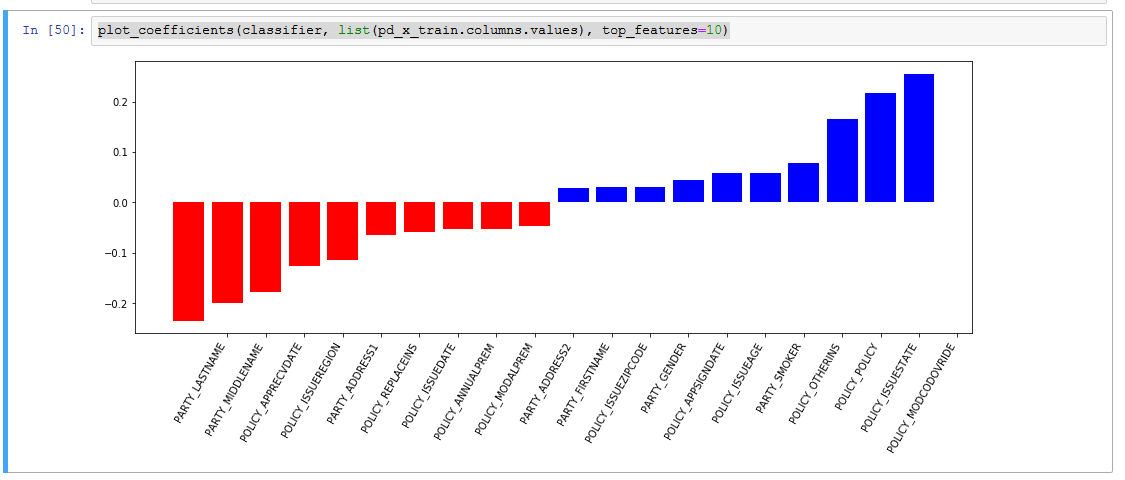

In [4]:
from IPython.display import Image
Image("coefficient_plot.png")


### V.iv Coefficient Analysis 



The "person-level" coefficients of relevance are: 
    * PARTY_LASTNAME
    * PARTY_MIDDLENAME
    * PARTY_ADDRESS1
    * PARTY_ADDRESS2
    * PARTY_BIRTHDATE
    * PARTY_EMAIL
    * PARTY_FIRSTNAME
    * PARTY_FULLNAME
   
We see in the above plot coefficients graph that some of these do have significant coefficient weightage w.r.t absolute value. Therefore there is some overfit and we must remove these fields in a new training data set. 

### V.v Remarks / Other Performance Metrics 

Lapse risk modelling seems to work with high efficiacy, provided that the performance metric is classification accuracy. Classification accuracy (error) is most commonly used, hence for its usage here. However, depending on end user use-cases, other performance metrics may be desired. Surveying research literature, not much was found regarding such topic; all papers surveyed utilized the standard classification accuracy metric. 

But suppose a different metric was indeed desired? How might one proceed? There are several options: 
1. If the metric is simply a one-to-one conversion from the old metric -- i.e. transforming from a continuous scale to a {low, med, high} scale, then this scenario has been discussed above. 
2. If we are in the linear regression regime, then beyond the canonical R^2 coefficient of determination, other metrics exist, such as 
    -- AIC 
    -- BIC
    -- MSE 
    -- etc.
    
Developing metrics such as the above would require *post-processing*; that is we have the following pipeline for regression: 

`DATA -> DATA PREPROCESS -> ML Module -> Output R^2 --> * <-- Feedback loop/cross-validation until R^2 satisfied`
 
Using metrics such as minimizing AIC on a linear regression model would entail manually calculating AIC after the 'Output R^2' step, and instead of performing cross-validation/etc using R^2, the reference point then enacts upon this extended calculation in AIC. The same loss functions, model would be the same. 

`DATA -> DATA PREPROCESS -> ML Module -> Output R^2 --> AIC --> * <-- Feedback loop/cross-validation until AIC satisfied`

In this example AIC is simply an extended metric. The end-user could also use any type of custom metric, and analogous to the above pipeline, perform cross-validation against this custom metric instead of R^2.  

Of note is that in the model training, gradient descent would *still* be a convex optimization problem minimizing MSE, as in classical fashion. In this regard, these custom metric models are not techncially seeking optimal solutions against said custom benchmark; rather they merely offer a "hack" method of incorporating other metrics into the overall problem-solving environment; the true efficicacy of said "hack" is therefore case-by-case dependent. 

Now, there may exist other loss function equivalents that say, minimize AIC instead of MSE. However, mathematics behind these other loss functions are beyond the scope of this paper, and need independent research. 

## VI Claims Ranking and Logistic Regression -- Kaggle Data 

Although sample data was not provided, example data can be found on the Kaggle website: https://www.kaggle.com/c/bnp-paribas-cardif-claims-management. The description, from Kaggle, reads: 

```You are provided with an anonymized dataset containing both categorical and numeric variables available when the claims were received by BNP Paribas Cardif. All string type variables are categorical. There are no ordinal variables.

The "target" column in the train set is the variable to predict. It is equal to 1 for claims suitable for an accelerated approval.

The task is to predict a probability ("PredictedProb") for each claim in the test set.
```

Thus the task at hand here is to output a probability "score" for each claim. Notice that this use-case differs from the prior; as now instead of a multiclassification problem we deal with a continuous random variable. Furthermore it asks us to create a probability for each entry, but where is that probability value coming from? 

The solution is to tackle this type of problem using logistic regression, which deals solely with probabiltities in its classification pursuit. 

Recall that the standard linear regression statistical model assumes a hypothesis: 

$$ 
 \begin{align*}
  y = \beta_0x_0 + \beta_1x_1 + ... + \beta_{d}x_{d} \\
    = \mathbf{x}^T\beta
 \end{align*}
$$

We may rewrite this as

$$ 
 \begin{align*}
  y  = h(\beta_0x_0 + \beta_1x_1 + ... + \beta_{d}x_{d}) \\
    = h(\mathbf{x}^T\beta)
 \end{align*}
$$

where $h(x)$ is called the "link" function in statistical nomenclature. It simply means that the response variable is a function of a linear combination of the inputs. For the case of linear regression, $h(x)$ is the $identity()$ function

#### Logistic Regression

For logistic regression, probabiltiies are incorporated into this mathematical boiling pot using a different link function, the *logit* function. 

$$ 
 \begin{align*}
  y = h(x) = g(\mathbf{x}^T\beta) = \frac{1}{1+e^{-\mathbf{x}^T\beta}}
 \end{align*}
$$

where $g(z)$ is the $sigmoid$ function. 

here, $y$ is now defined as a probability (this is by definition of logistic regression). We have that the probability of y==1 given data ***X*** and $\beta$ is $g(\mathbf{x}^T\beta)$

That's it. Obviously it is beyond the scope of this paper to delve into the mathematical derivations of logistic regression, but it can be concluded that if the end-use case is a *probability*, then a logistic classifier is the go-to model. 

Note that logistic regression is used for binary classification (multi classification) by taking the above one step further. That is, the canonical form is to let classification for a new target $y_i$ be: 
$$
\begin{align*}
&y_i = 1 \hspace{0.2cm}  g(\mathbf{x}^T\beta) \geq 0.5 \\
&y_i = 0 \hspace{0.1cm} \text{ otherwise}
\end{align*}
$$

Regardless, logistic regression deals solely in the probability space. 

A logistic regression code snippet example is below: 



```python
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

iris = datasets.load.iris() #load iris dataset 
X = iris.data[:,0:2] #only use first two features for viz. 
y = iris.target 

lamb = 0.1 #lambda 
clf = LogisticRegression(C=lamb, penalty='l2') #create Logistic Classifier 
clf.fit(X,y) #train it 
y_pred = clf.predict(X)

#Get probabilities
probas = clf.predict_proba(X) #get probabilities that y==1 for each data point in X
```

## VII Fraudulent Claims Data

There is no sample data for an exercise in detecting fraudulent claims. Most of the publically available literature out there deal with domains such as credit card fraud, etc. Nonetheless, the blueprint is the same: 

1. If the data is wholly numeric, or such that non-numeric variables are categorical or ordinal and easily tokenized/indexed, then apply the ML algorithm of choice. 
2. If the data contains textual fields, then a nuanced approach must be taken akin to the analysis done regarding Latent Dirichelet Allocation. 


#### Potential Use Cases/Response Variable 

Although we do not have data, we can imagine what the end use cases entail. First, the user might want to know the probability that a given claim is fraudulent. This problem can be approached analogous to that discussed in Section VI. Second, the user may want an ordinal scale of {not likely, somewhat likely, very likely}. The problem is then a multiclassification problem analogous to that in Section V. 


## VIII. Using Machine Learning Output For Business Decision Making

At the end of the day w.r.t. applied data science for an insurance firm, the data science methods employed are only as good/useful as their impacts, or lack thereof, for the business. As such we provide a simple scenario below to illustrate how the "result" of machine learning utilization can be piped into a cost-balancing decision. 

The example scenario is: suppose we are a business with a budget of B dollars allocated towards detecting fraudulent claims. There are unit costs of incorporating various strategies involving ML (and likewise not employing ML). We want to determine whether it is useful to spend this budget on using machine learning to first -- predict claims with high likelihood of being fraudulent, and second -- spend money on the "processing costs" i.e. call and argue for "one's money back or reimbursement" (we do not know the correct terminology here...). The alternative would be to do nothing and keep the money B. 

The constraints are: 

- Cost of calling to argue a claim ($x_i$) is fradulent (per claim) = C
- The "gain" of having identified a fraudulent claim is G
- Probability $P[x_i=fraud \hspace{0.3cm}\vert \hspace{0.3cm}\mathbf{X}, \beta] = p_i$
- Management has a budget of B allocated to fraud detection 
- There are N claims 
- The "cost" of holding onto a fraudulent claim is R
- There are $\rho$ percent of fraud claims, on average, in a given dataset of size N

#### Remarks
1. If do not do anything: 
$$
\mathbf{E}[*] = B -\rho NR
$$
2. The cost of processing to determine a claim is fraudulent is a sunk cost 
$$
\mathbf{E}[\text{process} \hspace{0.3cm}\vert \hspace{0.3cm} x_i] = C
$$

3. The expected value of doing something for a claim is
$$
\begin{align*}
\mathbf{E}[* \hspace{0.3cm}\vert \hspace{0.3cm} x_i] \\
= \mathbf{E}[* \hspace{0.3cm}\vert \hspace{0.3cm} x_i, process,fraud] + \mathbf{E}[* \hspace{0.3cm}\vert \hspace{0.3cm} x_i, process, nofraud] \\
= Gp_i - C
\end{align*}
$$

4. The total expected value of doing something for the maximum allowable number of claims is: 

Noting that the allowable number of claims to process if $\frac{B}{C}$ then 
$$
\begin{align*}
\mathbf{E}[*\hspace{0.3cm}\vert \hspace{0.3cm} \Gamma, B ] = \left(\sum_{\forall \hspace{0.1cm} x_i \in \Gamma} (Gp_i - C)\right)
\end{align*}
$$

Where $\Gamma$ is a subset of the full dataset of claims; there are $\frac{B}{C}$ number of claims in $\Gamma$ (naturally), and also naturally, the user might want to say $\Gamma$ =  top $\frac{B}{C}$ number of claims in ***X*** with the highest probability of fraud, again where the probability is determined by logistic regression. 

5. The net expected value, given gamma and budget B is then 
$$
\begin{align*}
\mathbf{E}[Net\hspace{0.3cm}\vert \hspace{0.3cm} \Gamma, B ] = \left(\sum_{\forall \hspace{0.1cm} x_i \in \Gamma} (Gp_i - C)\right)-\rho NR + B
\end{align*}
$$

Note that all the parameters except for $\Gamma$ and $p_i$ are 'fixed' -- they are the constraints. Also $\Gamma$ itself is a function of the $p_i$, as choosing a subset of the most-likely fraudulent items depends on the probabilities as well. Therefore the entire expected value expression can be seen as a function $g()$ of the logistic regression performance, aka classification error $\epsilon$

6. Decision Boundary 

A basic decision boundary would therefore be 
$$
\begin{align*}
g(\epsilon) = \mathbf{E}[Net\hspace{0.3cm}\vert \hspace{0.3cm} \Gamma, B ] > 0
\end{align*}
$$


The last point implies that the performance strength of a logistic regression model, as expected, can dictate business decision-making. If the overall classification error/mean-squared error is high, then the inequality may not hold and the decision would be to abort. Parallely, the selection of $\Gamma$ given $\epsilon$ does have significant impact; what if there are better methods to "picking the claims you think are most fraudulent" than a simple sort on probability of fraud. Maybe one draws $\Gamma \sim Normal_{\mathbf{X}}(\mu,\sigma)$ where $\mu$ is some cut-off probability. This regime our problem-solving environement is open-ended. 

Note that more abstractly, these type of problems are known as constrained optimization problems. There are several generic methods for solving these: method of Lagrange multiples, linear and quadratic programming, etc. Please see Section X: Further Reading for more information. 

## IX. Other Provided Files 

* `demo.py`: examples of scikit learn, as well as Rahul Birmiwal's multiclass classifier (and sklearn LinearSVC)
* `linearsvm.py`: From-scratch implementations of Linear & Kernel Multiclass SVM by Rahul Birmiwal 
* `my_cross_validation.py`: Cross-validation functions used for testing
* `plot_coefficients.py`: Function that takes a trained classifier and generates bar chart showing coefficient weights
* `textual_data_handling.py`: Associated Python source code for LDA, etc. 
* `icd_code_description_map.csv`: CSV file of the ICD-10 Code Mapping 
* `BNPParibas_trainData.csv`: Sample insurance data from BNP Paribas & Kaggle. Variable names here are anonymous

## X. Further Reading 

* Informative post on Latent Dirichelet Allocation in Python: https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
* Mathematically-heavy, but outstanding class notes from Stanford CS on Machine Learning from the prolific professor and a leader in the field of data science Andrew Ng: http://cs229.stanford.edu/notes/cs229-notes1.pdf
* Constrained Optimization: https://en.wikipedia.org/wiki/Constrained_optimization
* Geospatial Data Handling: Folium / Leaflet
* K-Nearest Neighbors in Python: https://www.python-course.eu/k_nearest_neighbor_classifier.php


## XI. An Aside: ARIMA Modelling:

Hitherto we have discussed essentially "static" data. However, some types of insurance data (i.e. sales) are more appropriately handled as *time-series data*. If this is the case, one can utilize various time-series forecasting methods (instead of regression). The most famous and widely-used family of methods is the ARIMA suite. 

The ARIMA family is a standard algorithm suite used for time-series modelling and forecasting. While beyond the complexities of this paper, the ARIMA model assumes that any time-series signal is borne from the following elements : 
1.	Seasonality: refers to fluctuations in the data related to calendar cycles
2.	Trends: the overall pattern of the series 
3.	Cyclical: Consists of patterns that are not seasonal. 

These three parameters are essentially hyperparameters to the underlying model. An excellent approach to ARIMA using the R language may be found here: https://otexts.org/fpp2/arima-r.html

An equivalent code snippet showing implementation in Python is shown below. We assume there exists some dataframe data: 
```python 
from pyramid.arima import auto_arima

stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(stepwise_model.aic())
```


## XII. Overview of Use-Case Ideas For Insurance Industry 

Here we provide a general list of use-case ideas pertinent to the insurance industry. For each we provide the type of ML problem one could use to assist in tackling that given case: 

1. Risk Assessment / Underwriter 
    - all ML models (multiclassification, regression, etc). 
    - however, output of ML model ought to be transformed to an ordinal scale like {low, med, high risk}
2. Fraud Detection 
    - most simply binary classification
3. Marketing. For example, effects on effects on marketing on product sales 
    - regression (i.e. modelling percent change/decrease in product sales) 
    - geographic / demographic targeting 
        - would entail feature engineering of geographic data and geospatial libraries like Folium/Leaflet
        - could use clustering (i.e. *K-Nearest Neighbors Classifier*) to cluster geospatially then pipe into multiclass classifier 
4. Customer Experience. For example, integrating customer feedback (text) 
    - text mining/LDA
5. Lapse Risk (see section on Lapse Risk Above)
6. 

## XIII. References 

1. https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c
2. Flavia Barsotti, Xavier Milhaud, Yahia Salhi. Lapse risk in life insurance: correlation and contagion
effects among policyholders’ behaviors. 2016. <hal-01282601v2>
3. Boodhun, N. & Jayabalan, M. Complex Intell. Syst. (2018) 4: 145. https://doi.org/10.1007/s40747-018-0072-1
4. https://www.kaggle.com/c/bnp-paribas-cardif-claims-management
5. University of Washington DATA 558. Z. Harchaoui, C. Jones. 2018 
6. Z. Akata, F. Perronnin, Z. Harchaoui and C. Schmid, "Good Practice in Large-Scale Learning for Image Classification," in IEEE Transactions on Pattern Analysis and Machine Intelligence, vol. 36, no. 3, pp. 507-520, March 2014.
doi: 10.1109/TPAMI.2013.146
7. Wang, Yibo & Xu, Wei. (2017). Leveraging deep learning with LDA-based text analytics to detect automobile insurance fraud. Decision Support Systems. 105. 10.1016/j.dss.2017.11.001. 
8. https://www.google.com/search?q=use+cases+in+the+insurance+industry&ie=utf-8&oe=utf-8&client=firefox-b-1-ab

